In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('BankChurners.csv')


In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Amt(Thousands)', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Geography', 'Churn'],
      dtype='object')

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the dataset loaded into a DataFrame called 'df'

# Define the bin edges for the months on book groups
bin_edges = [0, 12 , 24, 36, 48, float('inf')]

# Define the bin labels for the months on book groups
bin_labels = ['<12', '12 - 24', '25 - 36', '37 - 48' , '49+']

# Bin the months on book data into the defined groups
df['Months_Group'] = pd.cut(df['Months_on_book'], bins=bin_edges, labels=bin_labels, right=False)

# Filter the dataset for only "Existing Customer" and "Attrited Customer"
filtered_df = df[df['Attrition_Flag'].isin(['Existing Customer', 'Attrited Customer'])]

# Count the number of rows for each months group
months_counts = filtered_df['Months_Group'].value_counts()

# Create a new DataFrame to store the months group and attrition count
months_attrition_df = pd.DataFrame({
    'Months_Group': months_counts.index,
    'Existing Customer': filtered_df.loc[filtered_df['Attrition_Flag'] == 'Existing Customer', 'Months_Group'].value_counts(),
    'Attrited Customer': filtered_df.loc[filtered_df['Attrition_Flag'] == 'Attrited Customer', 'Months_Group'].value_counts()
})

# Sort the DataFrame by months group
months_attrition_df.sort_values('Months_Group', inplace=True)

# Calculate the total count of rows for each months group
total_counts = months_attrition_df['Existing Customer'] + months_attrition_df['Attrited Customer']

# Calculate the percentage of each subgroup
existing_customer_percentage = (months_attrition_df['Existing Customer'] / total_counts) * 100
attrited_customer_percentage = (months_attrition_df['Attrited Customer'] / total_counts) * 100

# Set the plot style
plt.style.use('seaborn')

# Create the stacked bar graph
fig, ax = plt.subplots(figsize=(9, 4))

# Plot the stacked bar graph with different colors for each subgroup
p1 = plt.bar(months_attrition_df['Months_Group'], months_attrition_df['Existing Customer'], label='Existing Customer', color='coral')
p2 = plt.bar(months_attrition_df['Months_Group'], months_attrition_df['Attrited Customer'], bottom=months_attrition_df['Existing Customer'], label='Attrited Customer', color='aqua')

# Add the floating percentage labels within each bar
for i, (bar1, bar2) in enumerate(zip(p1, p2)):
    width = bar1.get_width()
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    x, y1 = bar1.get_xy()
    y2 = bar2.get_y() + height2 / 2
    ax.annotate(f'{existing_customer_percentage[i]:.1f}%', (x + width / 2, y1 + height1 / 2), ha='center', va='center')
    ax.annotate(f'{attrited_customer_percentage[i]:.1f}%', (x + width / 2, y2), ha='center', va='center')

# Set the y-axis label
ax.set_ylabel('Number of Rows')
ax.set_xlabel('Period of relationship with bank in months ')


# Set the title
plt.title('Attrition by Months on Book')

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

#### after 2 years with the bank tend is high chance of posiblity of customer churn 

# Total_Relationship_Count (Number of products)

C:\Users\PSPA\AppData\Local\Temp\ipykernel_21844\3909664857.py:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


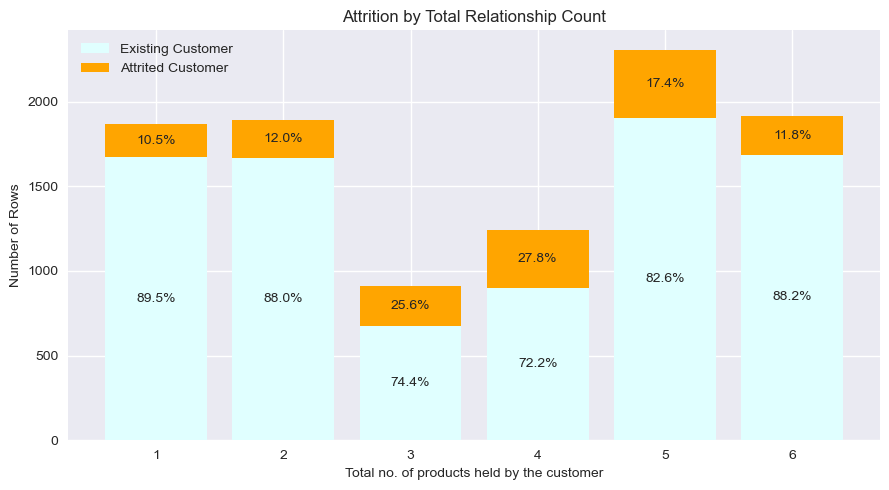

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the dataset loaded into a DataFrame called 'df'

# Filter the dataset for only "Existing Customer" and "Attrited Customer"
filtered_df = df[df['Attrition_Flag'].isin(['Existing Customer', 'Attrited Customer'])]

# Count the number of rows for each relationship count
relationship_counts = filtered_df['Total_Relationship_Count'].value_counts()

# Create a new DataFrame to store the relationship count and attrition count
relationship_attrition_df = pd.DataFrame({
    'Total_Relationship_Count': relationship_counts.index,
    'Existing Customer': filtered_df.loc[filtered_df['Attrition_Flag'] == 'Existing Customer', 'Total_Relationship_Count'].value_counts(),
    'Attrited Customer': filtered_df.loc[filtered_df['Attrition_Flag'] == 'Attrited Customer', 'Total_Relationship_Count'].value_counts()
})

# Sort the DataFrame by relationship count
relationship_attrition_df.sort_values('Total_Relationship_Count', inplace=True)

# Calculate the total count of rows for each relationship count
total_counts = relationship_attrition_df['Existing Customer'] + relationship_attrition_df['Attrited Customer']

# Calculate the percentage of each subgroup
existing_customer_percentage = (relationship_attrition_df['Existing Customer'] / total_counts) * 100
attrited_customer_percentage = (relationship_attrition_df['Attrited Customer'] / total_counts) * 100

# Set the plot style
plt.style.use('seaborn')

# Create the stacked bar graph
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the stacked bar graph with different colors for each subgroup
p1 = plt.bar(relationship_attrition_df['Total_Relationship_Count'], relationship_attrition_df['Existing Customer'], label='Existing Customer', color='lightcyan')
p2 = plt.bar(relationship_attrition_df['Total_Relationship_Count'], relationship_attrition_df['Attrited Customer'], bottom=relationship_attrition_df['Existing Customer'], label='Attrited Customer', color='orange')

# Add the floating percentage labels within each bar
for i, (bar1, bar2) in enumerate(zip(p1, p2)):
    width = bar1.get_width()
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    x, y1 = bar1.get_xy()
    y2 = bar2.get_y() + height2 / 2
    ax.annotate(f'{existing_customer_percentage.iloc[i]:.1f}%', (x + width / 2, y1 + height1 / 2), ha='center', va='center')
    ax.annotate(f'{attrited_customer_percentage.iloc[i]:.1f}%', (x + width / 2, y2), ha='center', va='center')

# Set the x-axis label
ax.set_xlabel('Total Relationship Count')

# Set the y-axis label
ax.set_ylabel('Number of Rows')
ax.set_xlabel('Total no. of products held by the customer')


# Set the title
plt.title('Attrition by Total Relationship Count')

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Highest churn customers hold the  3 to 5 products 

In [22]:
import pandas as pd

# Filter the dataset for existing customers
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']

# Group the data by Card_Category and Total_Relationship_Count, and calculate the count
count_table = existing_customers.groupby(['Card_Category', 'Total_Relationship_Count']).size().reset_index(name='Count')

# Sort the table by Card_Category and Total_Relationship_Count
count_table = count_table.sort_values(['Card_Category', 'Total_Relationship_Count']).reset_index(drop=True)

print(count_table)


   Card_Category  Total_Relationship_Count  Count
0           Blue                         1    588
1           Blue                         2    776
2           Blue                         3   1790
3           Blue                         4   1599
4           Blue                         5   1575
5           Blue                         6   1589
6           Gold                         1     18
7           Gold                         2     29
8           Gold                         3     15
9           Gold                         4     11
10          Gold                         5     12
11          Gold                         6     10
12      Platinum                         1      5
13      Platinum                         2      4
14      Platinum                         3      5
15      Platinum                         4      1
16        Silver                         1     66
17        Silver                         2     88
18        Silver                         3     95


C:\Users\PSPA\AppData\Local\Temp\ipykernel_21844\771847151.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20c', num_total_relationship_counts)


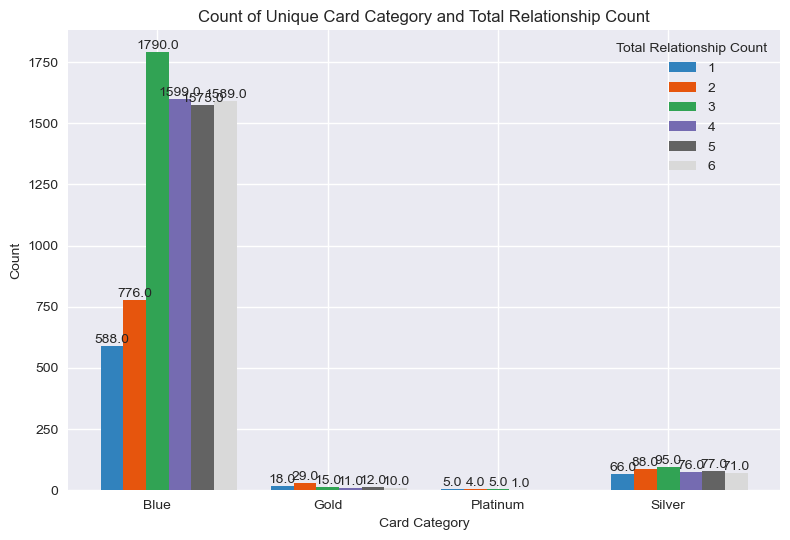

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Filter the dataset for existing customers
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']

# Group the data by Card_Category and Total_Relationship_Count, and calculate the count
count_table = existing_customers.groupby(['Card_Category', 'Total_Relationship_Count']).size().reset_index(name='Count')

# Get the number of unique Card_Category and Total_Relationship_Count
num_card_categories = count_table['Card_Category'].nunique()
num_total_relationship_counts = count_table['Total_Relationship_Count'].nunique()

# Create a table with the counts
table = count_table.pivot(index='Card_Category', columns='Total_Relationship_Count', values='Count')

# Create the bar plot
fig, ax = plt.subplots()
x = range(num_card_categories)

bar_width = 0.8 / num_total_relationship_counts
colors = cm.get_cmap('tab20c', num_total_relationship_counts)

for i, total_relationship_count in enumerate(count_table['Total_Relationship_Count'].unique()):
    count_values = table[total_relationship_count].values
    ax.bar(x, count_values, width=bar_width, align='edge', label=total_relationship_count, color=colors(i))

    # Add count values on top of each bar
    for j, count in enumerate(count_values):
        if pd.notnull(count):
            ax.text(x[j] + bar_width / 2, count, str(count), ha='center', va='bottom')

    x = [val + bar_width for val in x]

ax.set_xlabel('Card Category')
ax.set_ylabel('Count')
ax.set_title('Count of Unique Card Category and Total Relationship Count')
ax.set_xticks([val + bar_width * (num_total_relationship_counts - 1) / 2 for val in range(num_card_categories)])
ax.set_xticklabels(table.index)
ax.legend(title='Total Relationship Count')
plt.tight_layout()
plt.show()


### blue card category holding average 3-4 products. 
### and as above we see 3-4 product holder have a higher churn ratio

# credit limit vs total transection amount

C:\Users\PSPA\AppData\Local\Temp\ipykernel_21844\1709127505.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


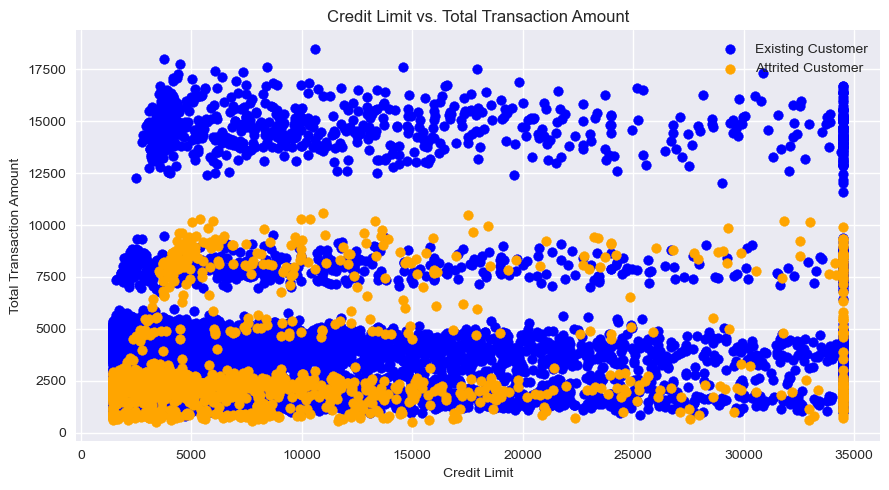

In [47]:
import matplotlib.pyplot as plt

# Filter the dataset for "Existing Customer" and "Attrited Customer"
filtered_df = df[df['Attrition_Flag'].isin(['Existing Customer', 'Attrited Customer'])]

# Set the plot style
plt.style.use('seaborn')

# Create the scatter plot
plt.figure(figsize=(9, 5))
plt.scatter(filtered_df.loc[filtered_df['Attrition_Flag'] == 'Existing Customer', 'Credit_Limit'],
            filtered_df.loc[filtered_df['Attrition_Flag'] == 'Existing Customer', 'Total_Trans_Amt'],
            color='blue',
            label='Existing Customer')
plt.scatter(filtered_df.loc[filtered_df['Attrition_Flag'] == 'Attrited Customer', 'Credit_Limit'],
            filtered_df.loc[filtered_df['Attrition_Flag'] == 'Attrited Customer', 'Total_Trans_Amt'],
            color='orange',
            label='Attrited Customer')

# Set the x-axis label
plt.xlabel('Credit Limit')

# Set the y-axis label
plt.ylabel('Total Transaction Amount')

# Set the title
plt.title('Credit Limit vs. Total Transaction Amount')

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


the less credit limit we found higher churn ratio. and where total transection amount is higher we found less churn ratio.

<Axes: xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

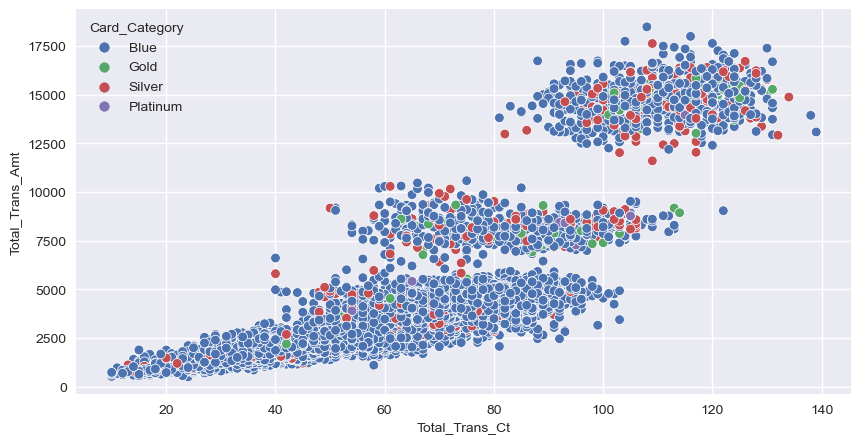

In [72]:
plt.figure(figsize=(10, 5))
sns.scatterplot(y=df['Total_Trans_Amt'], hue=df['Card_Category'], x=df['Total_Trans_Ct'] )

C:\Users\PSPA\AppData\Local\Temp\ipykernel_21844\710257442.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


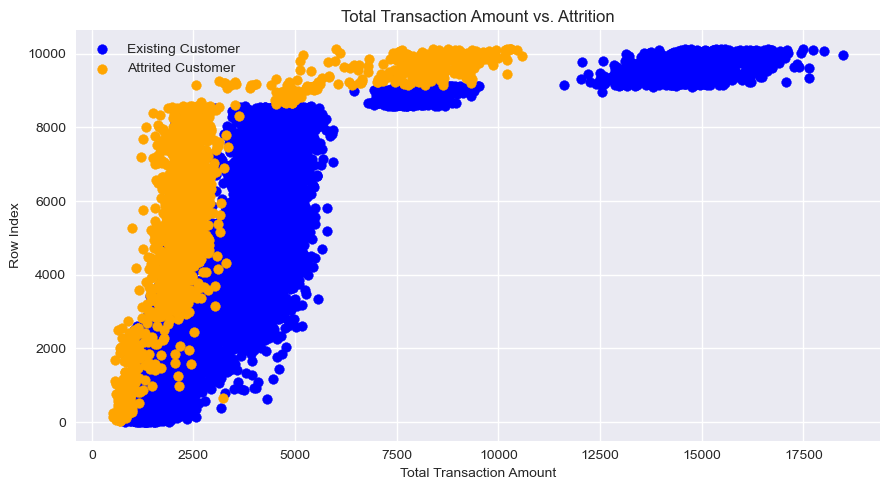

In [74]:
import matplotlib.pyplot as plt

# Filter the dataset for only "Existing Customer" and "Attrited Customer"
filtered_df = df[df['Attrition_Flag'].isin(['Existing Customer', 'Attrited Customer'])]

# Set the plot style
plt.style.use('seaborn')

# Create the scatter plot
plt.figure(figsize=(9, 5))
plt.scatter(filtered_df.loc[filtered_df['Attrition_Flag'] == 'Existing Customer', 'Total_Trans_Amt'],
            filtered_df.loc[filtered_df['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'].index,
            color='blue',
            label='Existing Customer')
plt.scatter(filtered_df.loc[filtered_df['Attrition_Flag'] == 'Attrited Customer', 'Total_Trans_Amt'],
            filtered_df.loc[filtered_df['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'].index,
            color='orange',
            label='Attrited Customer')

# Set the x-axis label
plt.xlabel('Total Transaction Amount')

# Set the y-axis label
plt.ylabel('Row Index')

# Set the title
plt.title('Total Transaction Amount vs. Attrition')

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Total Transection count

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

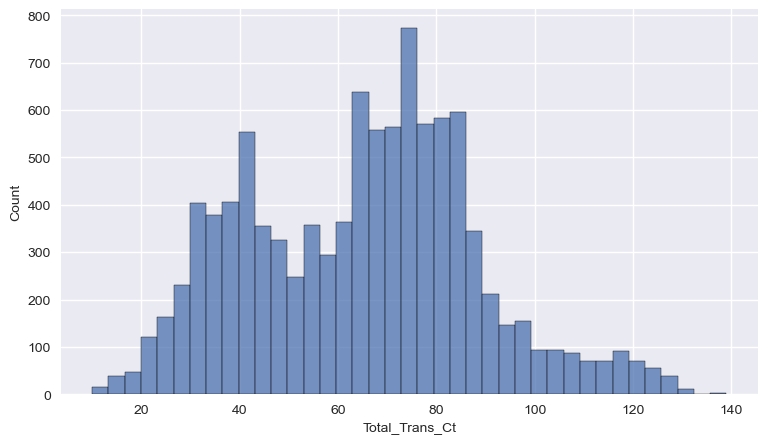

In [57]:
import seaborn as sns
plt.figure(figsize=(9, 5))
sns.histplot(x=df['Total_Trans_Ct'])


An average customer performs 64 transactions a year, a large number of customers also performs about 80 transactions.


# products vs Total_Trans_Ct

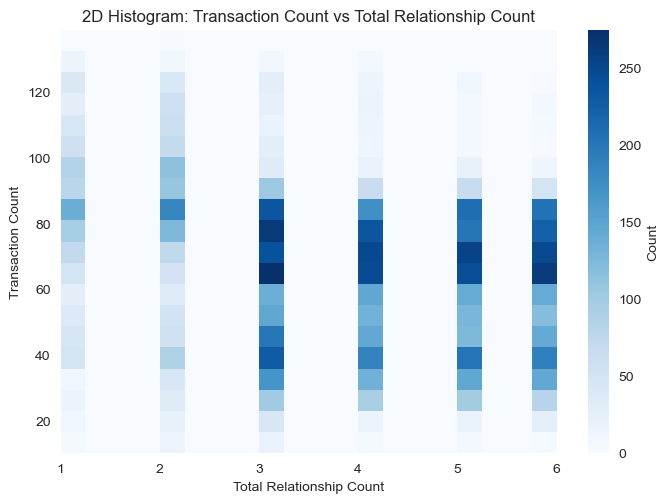

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Create 2D histogram plot with color labels
plt.hist2d(df['Total_Relationship_Count'], df['Total_Trans_Ct'], bins=20, cmap='Blues')

# Set labels and title
plt.xlabel('Total Relationship Count')
plt.ylabel('Transaction Count')
plt.title('2D Histogram: Transaction Count vs Total Relationship Count')

# Add color bar
cbar = plt.colorbar()
cbar.set_label('Count')

plt.show()


# Months on book vs Months_Inactive_12_mon

C:\Users\PSPA\AppData\Local\Temp\ipykernel_21844\2098621207.py:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


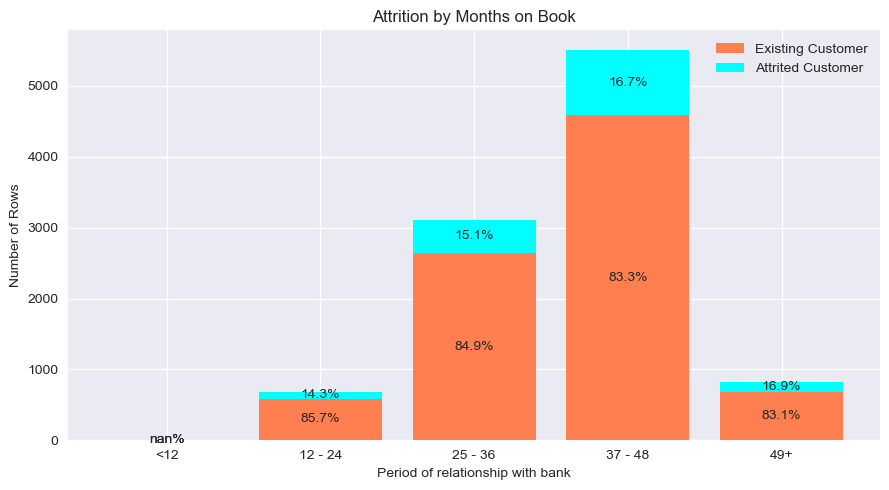

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the dataset loaded into a DataFrame called 'df'

# Define the bin edges for the months on book groups
bin_edges = [0, 12, 24, 36, 48, float('inf')]

# Define the bin labels for the months on book groups
bin_labels = ['<12', '12 - 24', '25 - 36', '37 - 48' , '49+']

# Bin the months on book data into the defined groups
df['Months_Group'] = pd.cut(df['Months_on_book'], bins=bin_edges, labels=bin_labels, right=False)

# Filter the dataset for only "Existing Customer" and "Attrited Customer"
filtered_df = df[df['Attrition_Flag'].isin(['Existing Customer', 'Attrited Customer'])]

# Count the number of rows for each months group
months_counts = filtered_df['Months_Group'].value_counts()

# Create a new DataFrame to store the months group and attrition count
months_attrition_df = pd.DataFrame({
    'Months_Group': months_counts.index,
    'Existing Customer': filtered_df.loc[filtered_df['Attrition_Flag'] == 'Existing Customer', 'Months_Group'].value_counts(),
    'Attrited Customer': filtered_df.loc[filtered_df['Attrition_Flag'] == 'Attrited Customer', 'Months_Group'].value_counts()
})

# Sort the DataFrame by months group
months_attrition_df.sort_values('Months_Group', inplace=True)

# Calculate the total count of rows for each months group
total_counts = months_attrition_df['Existing Customer'] + months_attrition_df['Attrited Customer']

# Calculate the percentage of each subgroup
existing_customer_percentage = (months_attrition_df['Existing Customer'] / total_counts) * 100
attrited_customer_percentage = (months_attrition_df['Attrited Customer'] / total_counts) * 100

# Set the plot style
plt.style.use('seaborn')

# Create the stacked bar graph
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the stacked bar graph with different colors for each subgroup
p1 = plt.bar(months_attrition_df['Months_Group'], months_attrition_df['Existing Customer'], label='Existing Customer', color='coral')
p2 = plt.bar(months_attrition_df['Months_Group'], months_attrition_df['Attrited Customer'], bottom=months_attrition_df['Existing Customer'], label='Attrited Customer', color='aqua')

# Add the floating percentage labels within each bar
for i, (bar1, bar2) in enumerate(zip(p1, p2)):
    width = bar1.get_width()
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    x, y1 = bar1.get_xy()
    y2 = bar2.get_y() + height2 / 2
    ax.annotate(f'{existing_customer_percentage[i]:.1f}%', (x + width / 2, y1 + height1 / 2), ha='center', va='center')
    ax.annotate(f'{attrited_customer_percentage[i]:.1f}%', (x + width / 2, y2), ha='center', va='center')

# Set the y-axis label
ax.set_ylabel('Number of Rows')
ax.set_xlabel('Period of relationship with bank')


# Set the title
plt.title('Attrition by Months on Book')

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


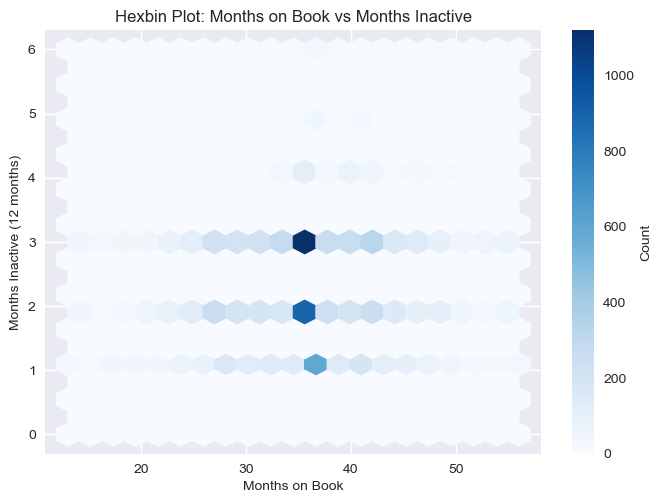

In [60]:
plt.hexbin(df['Months_on_book'], df['Months_Inactive_12_mon'], gridsize=20, cmap='Blues')
plt.xlabel('Months on Book')
plt.ylabel('Months Inactive (12 months)')
plt.title('Hexbin Plot: Months on Book vs Months Inactive')
plt.colorbar(label='Count')
plt.show()



after 2 years if customer inactive for more then 2 months then its higher chance to be churend 